In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the data
df = pd.read_csv('final_cleaned_processed_data.csv')
df.drop(columns=df.columns[0], axis=1, inplace=True)

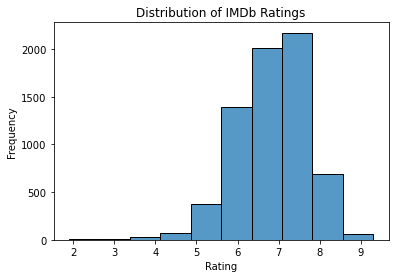

In [2]:
sns.histplot(df['Movie Rating'], kde=False, bins=10)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('Rating') 
plt.ylabel('Frequency')
plt.show()

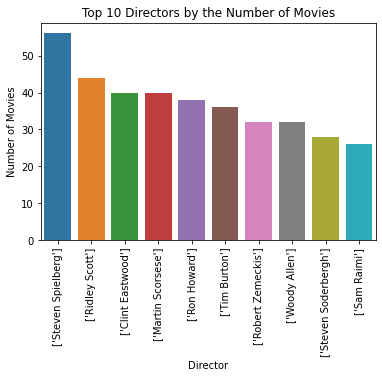

In [3]:
# plot the top 10 directors by the number of movies
top_directors = df['Director'].value_counts().nlargest(10)
sns.barplot(x=top_directors.index, y=top_directors.values)
plt.title('Top 10 Directors by the Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

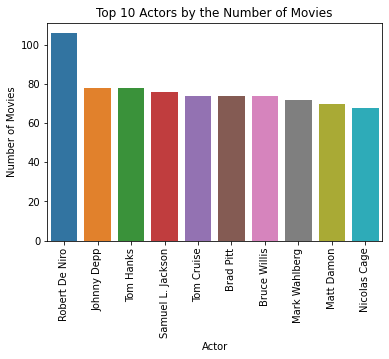

In [4]:
# plot the top 10 actors by the number of movies
actors = df['Star'].str.strip('[]').str.replace("'", "").str.split(', ')
all_actors = [actor for sublist in actors for actor in sublist]
top_actors = pd.Series(all_actors).value_counts().nlargest(10)
sns.barplot(x=top_actors.index, y=top_actors.values)
plt.title('Top 10 Actors by the Number of Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

In [5]:
"""This code is creating a heatmap to visualize the correlation matrix between the numerical variables 'Year of release', 'Movie Rating', and 'Metascore' in the dataset. 
The correlation matrix is computed using the corr() method of a pandas dataframe, and the resulting matrix is plotted using the seaborn heatmap() function. The heatmap shows the strength and direction of the linear relationship between the variables, 
with red indicating positive correlation and blue indicating negative correlation. The diagonal of the heatmap shows the correlation of each variable with itself, which is always
1. The plot can help to identify any relationships between the variables, and can guide further analysis or modeling."""

"This code is creating a heatmap to visualize the correlation matrix between the numerical variables 'Year of release', 'Movie Rating', and 'Metascore' in the dataset. \nThe correlation matrix is computed using the corr() method of a pandas dataframe, and the resulting matrix is plotted using the seaborn heatmap() function. The heatmap shows the strength and direction of the linear relationship between the variables, \nwith red indicating positive correlation and blue indicating negative correlation. The diagonal of the heatmap shows the correlation of each variable with itself, which is always\n1. The plot can help to identify any relationships between the variables, and can guide further analysis or modeling."

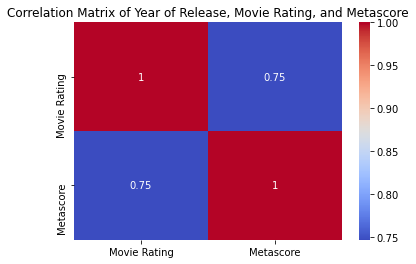

In [6]:
# plot the correlation matrix of numerical variables
corr_matrix = df[['Year of release', 'Movie Rating', 'Metascore']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Year of Release, Movie Rating, and Metascore')
plt.show()

Boxplot of movie ratings by genre:
We can use a boxplot to visualize the distribution of movie ratings by genre. 
This can help us understand if there are any differences in the ratings of movies belonging to different genres. 
Here's the code to create a boxplot:"""

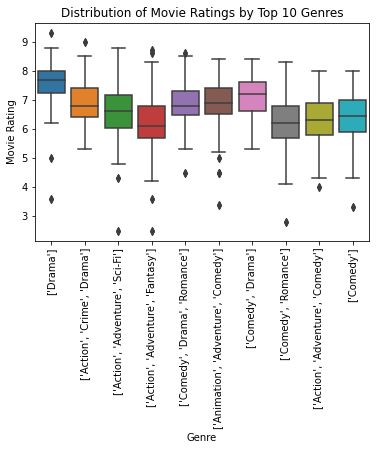

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read the csv file into a dataframe
df = pd.read_csv('final_cleaned_processed_data.csv')

# get the top 10 genres by count
top_10_genres = df['Genre'].value_counts().nlargest(10).index.tolist()

# filter the dataframe to only include movies in the top 10 genres
df_top_10 = df[df['Genre'].isin(top_10_genres)]

# create the boxplot
sns.boxplot(x='Genre', y='Movie Rating', data=df_top_10)
plt.title('Distribution of Movie Ratings by Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Movie Rating')
plt.xticks(rotation=90)
plt.show()

Scatter plot of movie rating vs metascore:
We can use a scatter plot to visualize the relationship between movie rating and metascore. 
This can help us understand if there is a correlation between the two variables. 
Here's the code to create a scatter plot:

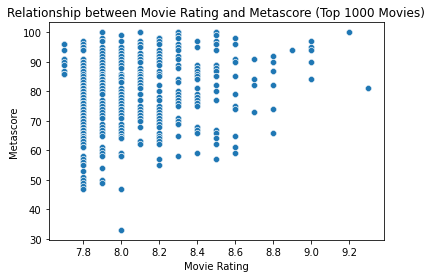

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read the csv file into a dataframe
df = pd.read_csv('final_cleaned_processed_data.csv')

# get the top 10 movies by Movie Rating and Metascore
top_10_movies = df.nlargest(1000, ['Movie Rating', 'Metascore'])

# create the scatterplot
sns.scatterplot(x='Movie Rating', y='Metascore', data=top_10_movies)
plt.title('Relationship between Movie Rating and Metascore (Top 1000 Movies)')
plt.xlabel('Movie Rating')
plt.ylabel('Metascore')
plt.show()

Heatmap of the top 10 actors and directors by movie rating:
We can create a heatmap to visualize the average movie rating for the top 10 actors and directors.
This can help us understand if certain actors or directors tend to make higher-rated movies. Here's the code to create a heatmap:


This exploratory data analysis aims to find the average movie rating for the top 10 actors and top 2 directors in the dataset.

First, the code selects the top 10 actors by counting the frequency of each actor's occurrence in the 'Star' column of the dataframe and selecting the 10 actors with the highest frequency. Similarly, it selects the top 2 directors by counting the frequency of each director's occurrence in the 'Director' column of the dataframe and selecting the 2 directors with the highest frequency.

Next, a new dataframe is created (df_top) by selecting only the rows that contain the top 10 actors in the 'Star' column and the top 2 directors in the 'Director' column.

Then, a pivot table is created using the pandas pivot_table function, with the 'Director' column as the index, the 'Star' column as the columns, and the 'Movie Rating' column as the values. The pivot table calculates the mean movie rating for each combination of director and star.

Finally, a heatmap is created using the seaborn heatmap function to visualize the pivot table. The heatmap shows the average movie rating for each combination of director and star, with the color indicating the level of rating (red for high rating and blue for low rating). The annotation parameter is set to True to display the actual values on the heatmap.

Overall, this exploratory data analysis provides insight into the relationship between top actors, top directors, and average movie ratings.

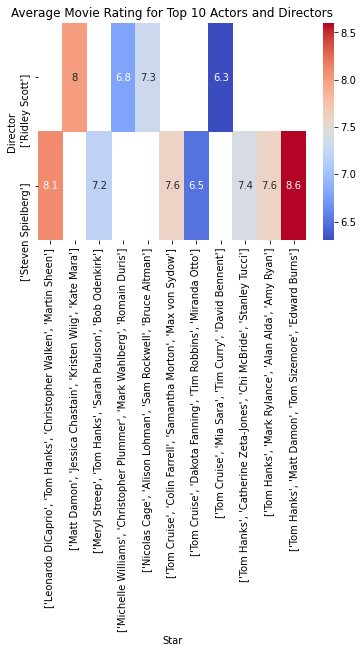

In [11]:
top_actors = pd.Series(all_actors).value_counts().nlargest(10).index
top_directors = df['Director'].value_counts().nlargest(2).index
df_top = df[df['Star'].str.contains('|'.join(top_actors)) & df['Director'].isin(top_directors)]
heatmap_data = pd.pivot_table(df_top, values='Movie Rating', index='Director', columns='Star', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True)
plt.title('Average Movie Rating for Top 10 Actors and Directors')
plt.show()

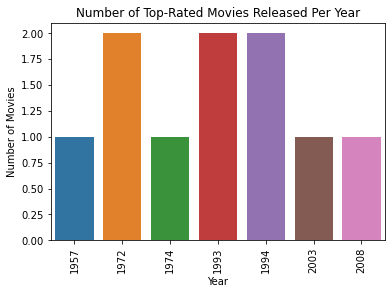

In [10]:
top_movies = df.sort_values(by='Movie Rating', ascending=False).head(10)
movies_per_year = top_movies['Year of release'].value_counts().sort_index()
sns.barplot(x=movies_per_year.index, y=movies_per_year.values)
plt.title('Number of Top-Rated Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()
